In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_paths = ['divvy_trips.csv', 'citi_trips.csv', 'metro_trips.csv']
trips = [pd.read_csv(file) for file in file_paths]

/var/folders/8x/g4wytk351v91wjbmk2dbkq7w0000gn/T/ipykernel_10989/1802991526.py:2: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  trips = [pd.read_csv(file) for file in file_paths]


In [3]:
for trip in trips:
    print(trip.columns)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_id', 'end_station_id', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'member_casual', 'start_geom', 'end_geom',
       'classification', 'associated_trip_id'],
      dtype='object')
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_id', 'end_station_id', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'member_casual', 'start_geom', 'end_geom',
       'classification'],
      dtype='object')
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_id', 'end_station_id', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'member_casual', 'start_geom', 'end_geom',
       'classification'],
      dtype='object')


In [9]:
pd.unique(trips[0].classification)

array(['none', 'MS', 'MI-FM', 'MI-LM', 'MI-FLM'], dtype=object)

Plot for Chicago (Divvy + CTA) completed.
Plot for New York City (Citi Bike + MTA) completed.
Plot for Los Angeles (Metro Bikeshare + Metro) completed.


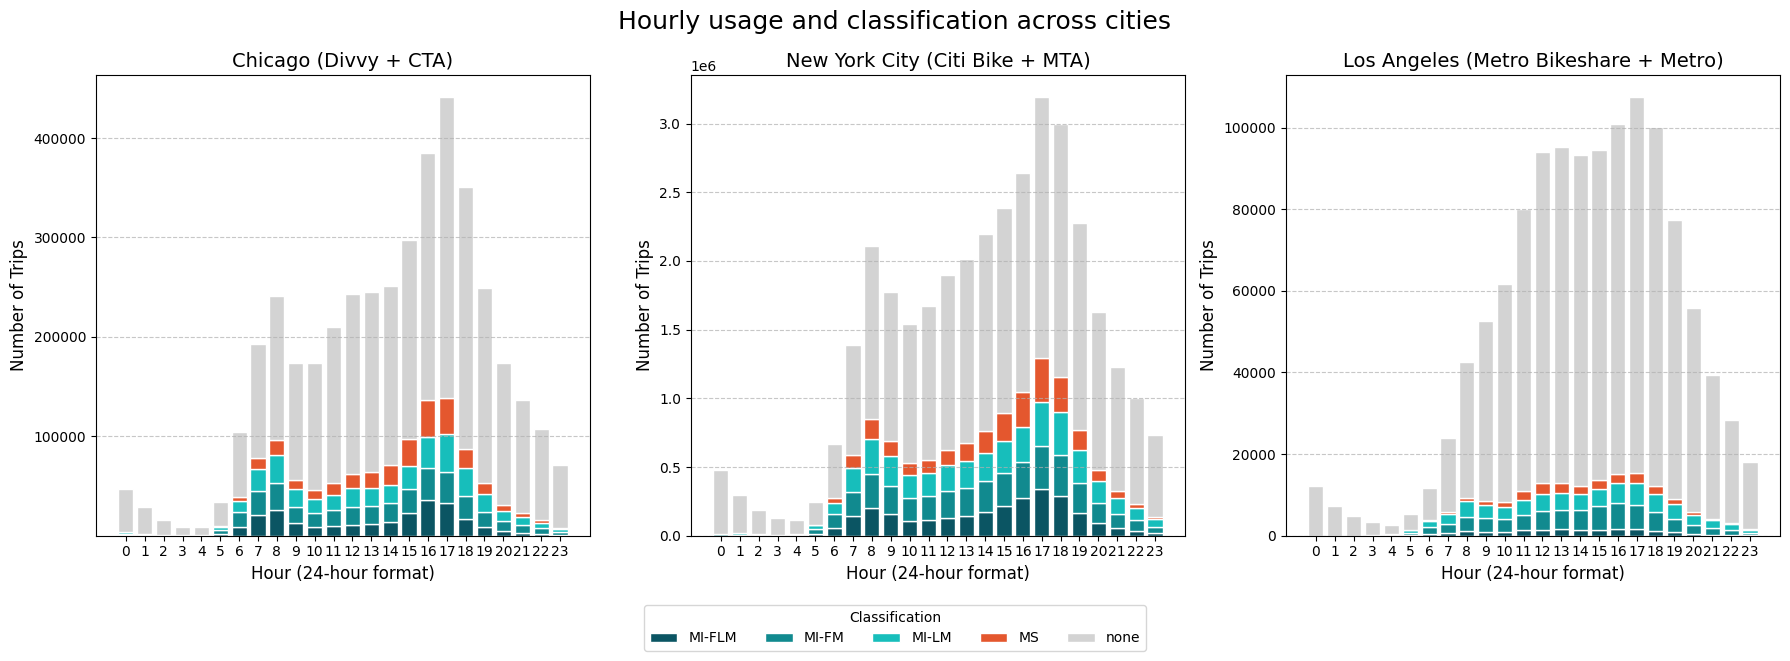

In [37]:
titles = ['Chicago (Divvy + CTA)', 'New York City (Citi Bike + MTA)', 'Los Angeles (Metro Bikeshare + Metro)']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
colors = {'MI-FLM': '#0B5563', 'MI-FM': '#118A8F', 'MI-LM': '#17BEBB', 'MS': '#E4572E', 'none': 'lightgrey'} 
# colors = {'MI-FLM': '#BBBDF6', 'MI-FM': '#645E9D', 'MI-LM': '#392B58', 'MS': '#78A300', 'none': 'lightgrey'}

fig.suptitle('Hourly usage and classification across cities', fontsize=18)

for i, (ax, file_path, title) in enumerate(zip(axes, file_paths, titles)):
    df = trips[i]

    df['hour'] = pd.to_datetime(df['started_at'], errors='coerce').dt.hour
    if df['hour'].isna().any():
        df = df.dropna(subset=['hour'])

    grouped = df.groupby(['hour', 'classification']).size().unstack(fill_value=0)

    hours = grouped.index
    classifications = grouped.columns

    bottom = pd.Series(0, index=hours)

    for classification in classifications:
        ax.bar(
            hours,
            grouped[classification],
            bottom=bottom,
            label=f'{classification}',
            color=colors.get(classification, 'black'),
            edgecolor='white'
        )
        bottom += grouped[classification]

    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Hour (24-hour format)', fontsize=12)
    ax.set_xticks(range(0, 24))
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_ylabel('Number of Trips', fontsize=12)

    print(f'Plot for {title} completed.')

handles, labels = ax.get_legend_handles_labels()
fig.legend(
    handles, labels,
    title='Classification',
    loc='lower center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=len(colors),
    fontsize=10
)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

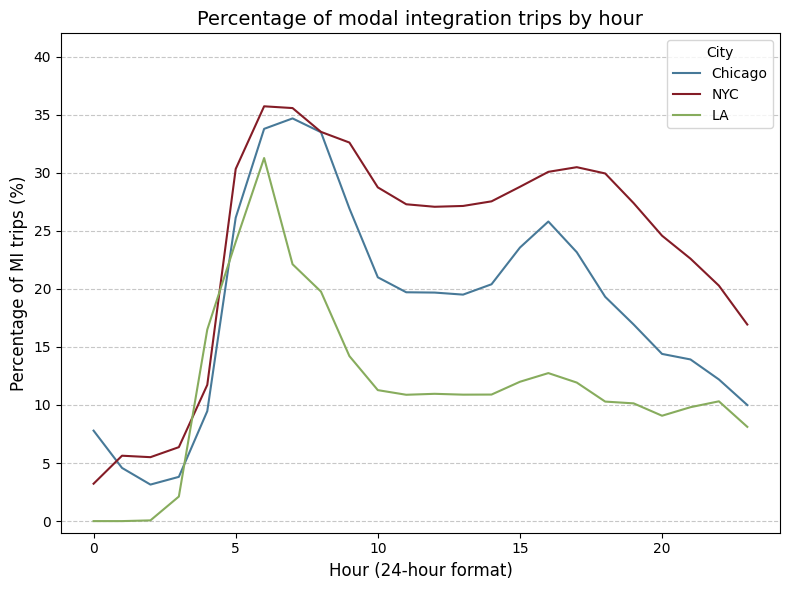

In [45]:
all_data = pd.DataFrame()
titles = ['Chicago', 'NYC', 'LA']
colors = {'Chicago': '#477998', 'NYC': '#841C26', 'LA': '#87AC5D'}

for i, (file_path, title) in enumerate(zip(file_paths, titles)):
    df = trips[i]

    df['hour'] = pd.to_datetime(df['started_at'], errors='coerce').dt.hour
    if df['hour'].isna().any():
        df = df.dropna(subset=['hour'])

    mi_classifications = ['MI-FM', 'MI-LM', 'MI-FLM']
    mi_df = df[df['classification'].isin(mi_classifications)]

    total_trips_per_hour = df.groupby('hour').size()
    mi_trips_per_hour = mi_df.groupby(['hour']).size()

    percentages = (mi_trips_per_hour / total_trips_per_hour) * 100
    percentages = percentages.fillna(0)

    percentages = percentages.reset_index(name='percentage')
    percentages['city'] = title

    all_data = pd.concat([all_data, percentages], ignore_index=True)

plt.figure(figsize=(8,6))

for city in titles:
    city_data = all_data[all_data['city'] == city]
    plt.plot(
        city_data['hour'],
        city_data['percentage'],
        label=f'{city}',
        color=colors[city]
    )

plt.xlabel('Hour (24-hour format)', fontsize=12)
plt.ylabel('Percentage of MI trips (%)', fontsize=12)
plt.title('Percentage of modal integration trips by hour', fontsize=14)
plt.legend(title='City', fontsize=10, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(-1, 42)

plt.tight_layout()
plt.show()
